In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import logging

logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [3]:
tfds.disable_progress_bar()

In [4]:
dataset, info = tfds.load('beans', with_info=True)

    'image': Image(shape=(500, 500, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
})> could not be transformed and will be executed as-is. Please report this to the AutoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: Bad argument number for Name: 3, expecting 4
    'image': Image(shape=(500, 500, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
})> could not be transformed and will be executed as-is. Please report this to the AutoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: Bad argument number for Name: 3, expecting 4
    'image': Image(shape=(500, 500, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
})> could not be transformed and will be executed as-is. Please report this to the AutoGraph te

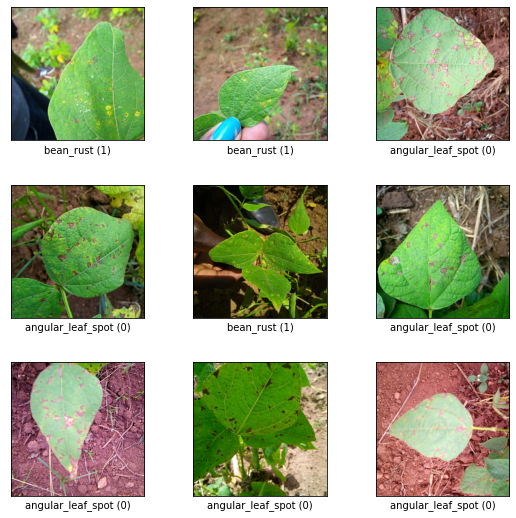

In [5]:
fig = tfds.show_examples(dataset['train'], info)

In [6]:
dataset, info = tfds.load('beans', with_info=True, as_supervised=True)

    'image': Image(shape=(500, 500, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
})> could not be transformed and will be executed as-is. Please report this to the AutoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: Bad argument number for Name: 3, expecting 4
    'image': Image(shape=(500, 500, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
})> could not be transformed and will be executed as-is. Please report this to the AutoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: Bad argument number for Name: 3, expecting 4
    'image': Image(shape=(500, 500, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
})> could not be transformed and will be executed as-is. Please report this to the AutoGraph te

In [7]:
info.description

'Beans is a dataset of images of beans taken in the field using smartphone\ncameras. It consists of 3 classes: 2 disease classes and the healthy class.\nDiseases depicted include Angular Leaf Spot and Bean Rust. Data was annotated\nby experts from the National Crops Resources Research Institute (NaCRRI) in\nUganda and collected by the Makerere AI research lab.'

In [8]:
info.splits

{'test': <tfds.core.SplitInfo num_examples=128>,
 'train': <tfds.core.SplitInfo num_examples=1034>,
 'validation': <tfds.core.SplitInfo num_examples=133>}

In [9]:
print(info.features['label'].names)

['angular_leaf_spot', 'bean_rust', 'healthy']


In [10]:
info.features

FeaturesDict({
    'image': Image(shape=(500, 500, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
})

In [11]:
train_data, valid_data, test_data = dataset['train'], dataset['validation'], dataset['test']

In [12]:
num_train = info.splits['train'].num_examples
num_valid = info.splits['validation'].num_examples
num_test  = info.splits['test'].num_examples
print("Train: %s  Validation: %s  Test: %s" % (num_train, num_valid, num_test))

Train: 1034  Validation: 133  Test: 128


In [13]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images = tf.image.resize_image_with_crop_or_pad(images, 224, 224)
  images /= 255.
  return images, labels

train_data = train_data.map(normalize, num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_data = train_data.shuffle(num_train)
train_data = train_data.cache()
train_data = train_data.batch(32)
train_data = train_data.repeat()
train_data = train_data.prefetch(tf.data.experimental.AUTOTUNE)

valid_data = valid_data.map(normalize, num_parallel_calls=tf.data.experimental.AUTOTUNE)
valid_data = valid_data.cache()
valid_data = valid_data.batch(32)
valid_data = valid_data.prefetch(tf.data.experimental.AUTOTUNE)

test_data = test_data.map(normalize, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test_data = test_data.cache()
test_data = test_data.batch(num_test)
test_data = test_data.prefetch(tf.data.experimental.AUTOTUNE)

In [14]:
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2"

feature_extractor = hub.KerasLayer(URL, input_shape=(224, 224,3))
feature_extractor.trainable = False

model = tf.keras.Sequential([
  feature_extractor,
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(3)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 128)               163968    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 387       
Total params: 2,422,339
Trainable params: 164,355
Non-trainable params: 2,257,984
_________________________________________________________________


In [15]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(64, (5,5), input_shape=(300, 300, 3)),
#     tf.keras.layers.Dropout(0.1),
#     tf.keras.layers.ReLU(),
#     tf.keras.layers.MaxPooling2D((4,4)),
    
#     tf.keras.layers.Conv2D(64, (5,5)),
#     tf.keras.layers.Dropout(0.1),
#     tf.keras.layers.ReLU(),
#     tf.keras.layers.MaxPooling2D((4,4)),
    
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(512),
#     tf.keras.layers.Dropout(0.1),
#     tf.keras.layers.ReLU(),
#     tf.keras.layers.Dense(3, activation='softmax')
# ])

In [16]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("beans_weights.h5", save_best_only=True)
early_stopping = tf.keras.callbacks.EarlyStopping(patience=50)

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5, amsgrad=True)

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              optimizer=optimizer, 
              metrics=['accuracy'])


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 128)               163968    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 387       
Total params: 2,422,339
Trainable params: 164,355
Non-trainable params: 2,257,984
_________________________________________________________________


In [18]:
history = model.fit(train_data, 
                    validation_data=valid_data, 
                    epochs=1500,
                    steps_per_epoch=num_train//32,
                    validation_steps=num_valid//32,
                    callbacks=[model_checkpoint, early_stopping])

Train on 32 steps, validate on 4 steps
Epoch 1/1500
32/32 [==============================] - 5s 171ms/step - loss: 1.5809 - acc: 0.2646 - val_loss: 1.4633 - val_acc: 0.1875
Epoch 2/1500
32/32 [==============================] - 1s 41ms/step - loss: 1.3899 - acc: 0.2784 - val_loss: 1.2942 - val_acc: 0.2500
Epoch 3/1500
32/32 [==============================] - 1s 35ms/step - loss: 1.2299 - acc: 0.3483 - val_loss: 1.1741 - val_acc: 0.3125
Epoch 4/1500
32/32 [==============================] - 1s 34ms/step - loss: 1.1306 - acc: 0.3972 - val_loss: 1.0784 - val_acc: 0.4219
Epoch 5/1500
32/32 [==============================] - 1s 35ms/step - loss: 1.0361 - acc: 0.4691 - val_loss: 0.9987 - val_acc: 0.5000
Epoch 6/1500
32/32 [==============================] - 1s 35ms/step - loss: 0.9627 - acc: 0.5220 - val_loss: 0.9326 - val_acc: 0.5469
Epoch 7/1500
32/32 [==============================] - 1s 35ms/step - loss: 0.9064 - acc: 0.5818 - val_loss: 0.8766 - val_acc: 0.6172
Epoch 8/1500
32/32 [=========

Epoch 62/1500
32/32 [==============================] - 1s 35ms/step - loss: 0.2629 - acc: 0.9052 - val_loss: 0.3129 - val_acc: 0.8828
Epoch 63/1500
32/32 [==============================] - 1s 31ms/step - loss: 0.2645 - acc: 0.9102 - val_loss: 0.3134 - val_acc: 0.8828
Epoch 64/1500
32/32 [==============================] - 1s 33ms/step - loss: 0.2662 - acc: 0.9072 - val_loss: 0.3121 - val_acc: 0.8828
Epoch 65/1500
32/32 [==============================] - 1s 34ms/step - loss: 0.2607 - acc: 0.9102 - val_loss: 0.3084 - val_acc: 0.8828
Epoch 66/1500
32/32 [==============================] - 1s 33ms/step - loss: 0.2609 - acc: 0.9172 - val_loss: 0.3082 - val_acc: 0.8828
Epoch 67/1500
32/32 [==============================] - 1s 35ms/step - loss: 0.2616 - acc: 0.9131 - val_loss: 0.3072 - val_acc: 0.8906
Epoch 68/1500
32/32 [==============================] - 1s 33ms/step - loss: 0.2599 - acc: 0.9132 - val_loss: 0.3033 - val_acc: 0.8906
Epoch 69/1500
32/32 [==============================] - 1s 33ms

Epoch 123/1500
32/32 [==============================] - 1s 33ms/step - loss: 0.1716 - acc: 0.9561 - val_loss: 0.2496 - val_acc: 0.9062
Epoch 124/1500
32/32 [==============================] - 1s 33ms/step - loss: 0.1658 - acc: 0.9571 - val_loss: 0.2487 - val_acc: 0.9062
Epoch 125/1500
32/32 [==============================] - 1s 29ms/step - loss: 0.1697 - acc: 0.9581 - val_loss: 0.2497 - val_acc: 0.9141
Epoch 126/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.1621 - acc: 0.9561 - val_loss: 0.2488 - val_acc: 0.9141
Epoch 127/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.1626 - acc: 0.9551 - val_loss: 0.2500 - val_acc: 0.9141
Epoch 128/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.1616 - acc: 0.9601 - val_loss: 0.2497 - val_acc: 0.9141
Epoch 129/1500
32/32 [==============================] - 1s 33ms/step - loss: 0.1622 - acc: 0.9581 - val_loss: 0.2484 - val_acc: 0.9141
Epoch 130/1500
32/32 [==============================] -

Epoch 184/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.1205 - acc: 0.9711 - val_loss: 0.2258 - val_acc: 0.9297
Epoch 185/1500
32/32 [==============================] - 1s 33ms/step - loss: 0.1189 - acc: 0.9731 - val_loss: 0.2241 - val_acc: 0.9297
Epoch 186/1500
32/32 [==============================] - 1s 33ms/step - loss: 0.1188 - acc: 0.9731 - val_loss: 0.2238 - val_acc: 0.9297
Epoch 187/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.1188 - acc: 0.9711 - val_loss: 0.2242 - val_acc: 0.9297
Epoch 188/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.1188 - acc: 0.9731 - val_loss: 0.2241 - val_acc: 0.9297
Epoch 189/1500
32/32 [==============================] - 1s 34ms/step - loss: 0.1250 - acc: 0.9721 - val_loss: 0.2233 - val_acc: 0.9297
Epoch 190/1500
32/32 [==============================] - 1s 31ms/step - loss: 0.1187 - acc: 0.9741 - val_loss: 0.2234 - val_acc: 0.9297
Epoch 191/1500
32/32 [==============================] -

Epoch 245/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.0871 - acc: 0.9850 - val_loss: 0.2123 - val_acc: 0.9453
Epoch 246/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.0903 - acc: 0.9840 - val_loss: 0.2129 - val_acc: 0.9297
Epoch 247/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.0874 - acc: 0.9860 - val_loss: 0.2121 - val_acc: 0.9375
Epoch 248/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.0861 - acc: 0.9830 - val_loss: 0.2137 - val_acc: 0.9297
Epoch 249/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.0897 - acc: 0.9830 - val_loss: 0.2125 - val_acc: 0.9375
Epoch 250/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.0875 - acc: 0.9850 - val_loss: 0.2129 - val_acc: 0.9375
Epoch 251/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.0905 - acc: 0.9810 - val_loss: 0.2111 - val_acc: 0.9375
Epoch 252/1500
32/32 [==============================] -

Epoch 306/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.0706 - acc: 0.9880 - val_loss: 0.2068 - val_acc: 0.9453
Epoch 307/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.0695 - acc: 0.9930 - val_loss: 0.2057 - val_acc: 0.9453
Epoch 308/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.0644 - acc: 0.9930 - val_loss: 0.2052 - val_acc: 0.9453
Epoch 309/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.0704 - acc: 0.9920 - val_loss: 0.2076 - val_acc: 0.9453
Epoch 310/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.0723 - acc: 0.9890 - val_loss: 0.2060 - val_acc: 0.9453
Epoch 311/1500
32/32 [==============================] - 1s 31ms/step - loss: 0.0685 - acc: 0.9900 - val_loss: 0.2067 - val_acc: 0.9453
Epoch 312/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.0673 - acc: 0.9910 - val_loss: 0.2060 - val_acc: 0.9453
Epoch 313/1500
32/32 [==============================] -

Epoch 367/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.0533 - acc: 0.9950 - val_loss: 0.2039 - val_acc: 0.9453
Epoch 368/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.0605 - acc: 0.9930 - val_loss: 0.2024 - val_acc: 0.9453
Epoch 369/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.0529 - acc: 0.9970 - val_loss: 0.2032 - val_acc: 0.9453
Epoch 370/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.0537 - acc: 0.9930 - val_loss: 0.2030 - val_acc: 0.9453
Epoch 371/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.0575 - acc: 0.9920 - val_loss: 0.2027 - val_acc: 0.9453
Epoch 372/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.0516 - acc: 0.9980 - val_loss: 0.2017 - val_acc: 0.9453
Epoch 373/1500
32/32 [==============================] - 1s 34ms/step - loss: 0.0565 - acc: 0.9960 - val_loss: 0.2012 - val_acc: 0.9453
Epoch 374/1500
32/32 [==============================] -

Epoch 428/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.0470 - acc: 0.9980 - val_loss: 0.1995 - val_acc: 0.9453
Epoch 429/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.0486 - acc: 0.9940 - val_loss: 0.1996 - val_acc: 0.9453
Epoch 430/1500
32/32 [==============================] - 1s 31ms/step - loss: 0.0474 - acc: 0.9971 - val_loss: 0.1998 - val_acc: 0.9453
Epoch 431/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.0431 - acc: 0.9990 - val_loss: 0.2002 - val_acc: 0.9453
Epoch 432/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.0469 - acc: 0.9970 - val_loss: 0.1998 - val_acc: 0.9453
Epoch 433/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.0461 - acc: 0.9960 - val_loss: 0.2004 - val_acc: 0.9453
Epoch 434/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.0477 - acc: 0.9970 - val_loss: 0.2002 - val_acc: 0.9453
Epoch 435/1500
32/32 [==============================] -

Epoch 489/1500
32/32 [==============================] - 1s 33ms/step - loss: 0.0393 - acc: 0.9990 - val_loss: 0.1969 - val_acc: 0.9453
Epoch 490/1500
32/32 [==============================] - 1s 31ms/step - loss: 0.0369 - acc: 0.9990 - val_loss: 0.1978 - val_acc: 0.9453
Epoch 491/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.0357 - acc: 1.0000 - val_loss: 0.1982 - val_acc: 0.9453
Epoch 492/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.0385 - acc: 0.9990 - val_loss: 0.1992 - val_acc: 0.9453
Epoch 493/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.0407 - acc: 0.9970 - val_loss: 0.1990 - val_acc: 0.9453
Epoch 494/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.0398 - acc: 0.9950 - val_loss: 0.1987 - val_acc: 0.9453
Epoch 495/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.0389 - acc: 0.9960 - val_loss: 0.1988 - val_acc: 0.9453
Epoch 496/1500
32/32 [==============================] -

Epoch 550/1500
32/32 [==============================] - 1s 31ms/step - loss: 0.0343 - acc: 0.9970 - val_loss: 0.1968 - val_acc: 0.9453
Epoch 551/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.0331 - acc: 0.9970 - val_loss: 0.1970 - val_acc: 0.9453
Epoch 552/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.0318 - acc: 0.9990 - val_loss: 0.1962 - val_acc: 0.9453
Epoch 553/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.0334 - acc: 1.0000 - val_loss: 0.1960 - val_acc: 0.9453
Epoch 554/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.0318 - acc: 0.9980 - val_loss: 0.1973 - val_acc: 0.9453
Epoch 555/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.0316 - acc: 0.9980 - val_loss: 0.1979 - val_acc: 0.9453
Epoch 556/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.0325 - acc: 0.9990 - val_loss: 0.1977 - val_acc: 0.9453
Epoch 557/1500
32/32 [==============================] -

Epoch 611/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.0280 - acc: 0.9990 - val_loss: 0.1961 - val_acc: 0.9453
Epoch 612/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.0295 - acc: 0.9990 - val_loss: 0.1958 - val_acc: 0.9453
Epoch 613/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.0275 - acc: 1.0000 - val_loss: 0.1956 - val_acc: 0.9453
Epoch 614/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.0295 - acc: 1.0000 - val_loss: 0.1965 - val_acc: 0.9453
Epoch 615/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.0266 - acc: 0.9990 - val_loss: 0.1968 - val_acc: 0.9453
Epoch 616/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.0276 - acc: 0.9990 - val_loss: 0.1971 - val_acc: 0.9453
Epoch 617/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.0265 - acc: 1.0000 - val_loss: 0.1967 - val_acc: 0.9453
Epoch 618/1500
32/32 [==============================] -

Epoch 672/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.0246 - acc: 0.9990 - val_loss: 0.1956 - val_acc: 0.9453
Epoch 673/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.0247 - acc: 1.0000 - val_loss: 0.1957 - val_acc: 0.9453
Epoch 674/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.0220 - acc: 1.0000 - val_loss: 0.1964 - val_acc: 0.9453
Epoch 675/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.0252 - acc: 0.9990 - val_loss: 0.1968 - val_acc: 0.9453
Epoch 676/1500
32/32 [==============================] - 1s 30ms/step - loss: 0.0239 - acc: 0.9990 - val_loss: 0.1967 - val_acc: 0.9453
Epoch 677/1500
32/32 [==============================] - 1s 31ms/step - loss: 0.0263 - acc: 0.9990 - val_loss: 0.1954 - val_acc: 0.9453
Epoch 678/1500
32/32 [==============================] - 1s 31ms/step - loss: 0.0259 - acc: 1.0000 - val_loss: 0.1955 - val_acc: 0.9453
Epoch 679/1500
32/32 [==============================] -

In [19]:
model.load_weights("beans_weights.h5")

In [20]:
results = model.evaluate(test_data)
dict(zip(model.metrics_names, results))

      1/Unknown - 2s 2s/step - loss: 0.1982 - acc: 0.9219

{'loss': 0.19822603464126587, 'acc': 0.921875}